In [1]:
from tqdm import tqdm
import numpy as np
from src.structures import User, Movie
from src.data_methods import read_movies,read_viewers
import kagglehub
import os

In [2]:
# Download latest version
#please ikke offentliggør min api key. 
os.environ['KAGGLE_USERNAME'] = "marcusgaleajacobsen"
os.environ['KAGGLE_KEY'] = "32a3003f52c97053841ea46c492128dc"
datapath = kagglehub.dataset_download("netflix-inc/netflix-prize-data")

In [3]:
n_lines = 1000000#number of reviews to read
datafiles = ["combined_data_1.txt"]#, "combined_data_2.txt", "combined_data_3.txt", "combined_data_4.txt"]
with_tqdm = True #set to True to see progress bar (reduce speed)
reviews_pr_user = 10 #number of reviews per user to read

movies = read_movies(datapath)
users = read_viewers(datapath, movies, datafiles = datafiles, with_tqdm= with_tqdm, n_lines=n_lines) #read only 100000 

100%|██████████| 1000000/1000000 [00:05<00:00, 170179.82it/s]


In [4]:
#compute similarity matrix
n_movies = len(movies)
sim_matrix = np.zeros((n_movies, n_movies))
for i, movie_id1 in enumerate(tqdm(movies)):
    for j, movie_id2 in enumerate(movies):
        if j < i:
            sim_matrix[i, j] = movies[movie_id1].similarity(movies[movie_id2], method = "jaccard")
            sim_matrix[j, i] = sim_matrix[i, j]
        if j == i:
            sim_matrix[i, j] = np.nan

100%|██████████| 225/225 [00:47<00:00,  4.73it/s]


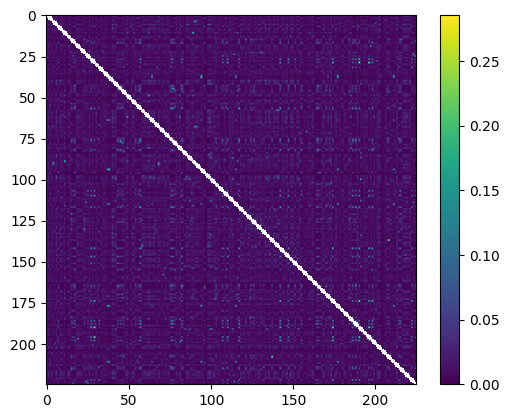

In [97]:
#heatmap of similarity matrix
import matplotlib.pyplot as plt
plt.imshow(sim_matrix)
plt.colorbar()
plt.show()

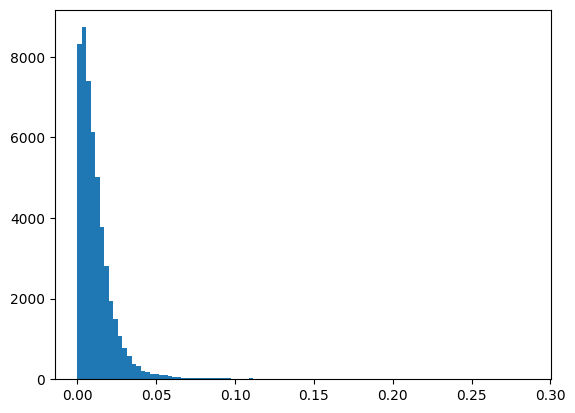

In [23]:
#make histogram of of similarity values
plt.hist(sim_matrix.flatten(), bins = 100)
plt.show()

In [130]:
t = 0.04
b = 20
r= -np.log(b)/np.log(t) 
n_hashes = 40#int(np.ceil(r*b))

In [131]:
from src.similarity_methods import compute_signatures, create_buckets, get_candidates, trim_candidates
n_buckets = len(movies)**2

SIG = compute_signatures(movies, n_hashes, with_tqdm = True)

100%|██████████| 225/225 [00:18<00:00, 12.00it/s]


In [132]:
n_buckets = 2**16
buckets = create_buckets(SIG, bands = b, n_buckets= n_buckets)

In [133]:
candidate_pairs = get_candidates(buckets)

100%|██████████| 20/20 [00:00<00:00, 209.66it/s]


In [134]:
candidate_pairs

{('100', '101'),
 ('100', '214'),
 ('101', '202'),
 ('101', '214'),
 ('104', '165'),
 ('104', '171'),
 ('104', '24'),
 ('108', '167'),
 ('108', '197'),
 ('108', '216'),
 ('108', '30'),
 ('110', '208'),
 ('110', '73'),
 ('110', '90'),
 ('111', '148'),
 ('114', '135'),
 ('114', '85'),
 ('115', '25'),
 ('118', '33'),
 ('118', '78'),
 ('124', '222'),
 ('126', '210'),
 ('127', '155'),
 ('127', '47'),
 ('128', '60'),
 ('129', '132'),
 ('138', '209'),
 ('143', '156'),
 ('143', '166'),
 ('143', '167'),
 ('143', '175'),
 ('143', '187'),
 ('143', '197'),
 ('143', '215'),
 ('143', '223'),
 ('143', '30'),
 ('143', '58'),
 ('143', '83'),
 ('147', '224'),
 ('148', '223'),
 ('148', '44'),
 ('148', '58'),
 ('148', '97'),
 ('15', '95'),
 ('150', '41'),
 ('152', '84'),
 ('156', '165'),
 ('156', '166'),
 ('156', '167'),
 ('156', '187'),
 ('156', '215'),
 ('156', '223'),
 ('156', '58'),
 ('156', '83'),
 ('157', '2'),
 ('159', '72'),
 ('16', '216'),
 ('161', '79'),
 ('165', '18'),
 ('165', '208'),
 ('165',

In [40]:
# n_removed = trim_candidates(movies, candidates, threshold = t)
# print(f"Removed {n_removed} from {len(candidates)} candidates")

In [142]:
def get_true_pairs(movies, sim_matrix, t):
    pairs = sim_matrix > t
    idx_map = {i: movie_id for i, movie_id in enumerate(movies)}
    #get indices of pairs
    movie_id1, movie_id2 = np.where(pairs)
    pairs = list(zip(movie_id1, movie_id2))
    true_pairs = [(idx_map[i], idx_map[j]) for i, j in pairs if i != j and i < j]
    return true_pairs

true_pairs = get_true_pairs(movies, sim_matrix, t)
true_pairs

[('2', '69'),
 ('2', '149'),
 ('3', '57'),
 ('3', '97'),
 ('3', '145'),
 ('3', '213'),
 ('4', '207'),
 ('5', '69'),
 ('5', '91'),
 ('5', '92'),
 ('6', '201'),
 ('7', '41'),
 ('7', '43'),
 ('7', '64'),
 ('7', '66'),
 ('7', '86'),
 ('7', '87'),
 ('7', '99'),
 ('7', '100'),
 ('7', '119'),
 ('7', '130'),
 ('7', '134'),
 ('7', '139'),
 ('7', '147'),
 ('7', '190'),
 ('7', '214'),
 ('7', '219'),
 ('7', '222'),
 ('8', '18'),
 ('8', '30'),
 ('8', '52'),
 ('8', '83'),
 ('8', '97'),
 ('8', '108'),
 ('8', '143'),
 ('8', '156'),
 ('8', '167'),
 ('8', '175'),
 ('8', '187'),
 ('8', '191'),
 ('8', '197'),
 ('8', '199'),
 ('8', '223'),
 ('9', '41'),
 ('9', '134'),
 ('10', '112'),
 ('12', '47'),
 ('12', '50'),
 ('12', '54'),
 ('12', '63'),
 ('12', '73'),
 ('12', '90'),
 ('12', '104'),
 ('12', '117'),
 ('12', '155'),
 ('12', '161'),
 ('12', '173'),
 ('14', '149'),
 ('14', '163'),
 ('14', '174'),
 ('14', '220'),
 ('15', '61'),
 ('15', '218'),
 ('16', '24'),
 ('16', '48'),
 ('16', '55'),
 ('16', '58'),
 ('

In [143]:
#create confusion matrix for candidates and true pairs
from math import comb
def confusion_matrix(candidate_pairs, true_pairs, n_movies):
    n_pairs = comb(n_movies, 2) # number of possible pairs
    n_candidates = len(candidate_pairs) # number of candidate pairs
    
    #initialize confusion matrix
    confusion_matrix = np.zeros((2, 2))
    for i, j in candidate_pairs:
        if (i, j) in true_pairs: #true positive
            confusion_matrix[0, 0] += 1
        else: #false positive
            confusion_matrix[0, 1] += 1
    for i, j in true_pairs: 
        if (i, j) not in candidate_pairs: #false negative
            confusion_matrix[1, 0] += 1
    confusion_matrix[1, 1] = n_pairs - n_candidates - confusion_matrix[1, 0] #true negative
    return confusion_matrix

In [145]:
CM = confusion_matrix(candidate_pairs, true_pairs, len(movies))
CM

array([[   47.,    83.],
       [  789., 24281.]])

In [146]:
def sensitivity_specificity(CM):
    TP, FP, FN, TN = CM.flatten()
    sensitivity = TP/(TP + FN)
    specificity = TN/(TN + FP)
    return sensitivity, specificity

In [147]:
TPR, TNR = sensitivity_specificity(CM)

In [148]:
#use TPR and FPR FNR and TNR to evaluate the method
FPR = 1 - TNR
FNR = 1 - TPR
print(f"TPR: {TPR:.2f}, FPR: {FPR:.2f}, FNR: {FNR:.2f}, TNR: {TNR:.2f}")

TPR: 0.06, FPR: 0.00, FNR: 0.94, TNR: 1.00


In [151]:
candidate_pairs

{('100', '101'),
 ('100', '214'),
 ('101', '202'),
 ('101', '214'),
 ('104', '165'),
 ('104', '171'),
 ('104', '24'),
 ('108', '167'),
 ('108', '197'),
 ('108', '216'),
 ('108', '30'),
 ('110', '208'),
 ('110', '73'),
 ('110', '90'),
 ('111', '148'),
 ('114', '135'),
 ('114', '85'),
 ('115', '25'),
 ('118', '33'),
 ('118', '78'),
 ('124', '222'),
 ('126', '210'),
 ('127', '155'),
 ('127', '47'),
 ('128', '60'),
 ('129', '132'),
 ('138', '209'),
 ('143', '156'),
 ('143', '166'),
 ('143', '167'),
 ('143', '175'),
 ('143', '187'),
 ('143', '197'),
 ('143', '215'),
 ('143', '223'),
 ('143', '30'),
 ('143', '58'),
 ('143', '83'),
 ('147', '224'),
 ('148', '223'),
 ('148', '44'),
 ('148', '58'),
 ('148', '97'),
 ('15', '95'),
 ('150', '41'),
 ('152', '84'),
 ('156', '165'),
 ('156', '166'),
 ('156', '167'),
 ('156', '187'),
 ('156', '215'),
 ('156', '223'),
 ('156', '58'),
 ('156', '83'),
 ('157', '2'),
 ('159', '72'),
 ('16', '216'),
 ('161', '79'),
 ('165', '18'),
 ('165', '208'),
 ('165',

In [193]:
#compute precision and recall for different thresholds
t_min = 0.001
t_max = np.nanmax(sim_matrix)
#sample thresholds increasingly logarithmically
t_range = np.logspace(np.log10(t_min), np.log10(t_max*0.97), num = 1000)
TPR_theshold = []
TNR_theshold = []
FPR_theshold = []
FNR_theshold = []
for t in t_range:
    true_pairs = get_true_pairs(movies, sim_matrix, t)
    CM = confusion_matrix(candidate_pairs, true_pairs, len(movies))
    TPR, TNR = sensitivity_specificity(CM)
    TPR_theshold.append(TPR)
    TNR_theshold.append(TNR)
    FPR_theshold.append(1 - TNR)
    FNR_theshold.append(1 - TPR)

In [194]:
#plot precision and recall as ROC curve with Plotly
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x = FPR_theshold, y = TPR_theshold, mode = "lines", name = "ROC curve"))
fig.update_layout(title = "ROC curve", xaxis_title = "False positive rate", yaxis_title = "True positive rate")
fig.show()

In [197]:
true_pairs

[('138', '209'), ('175', '191')]

In [200]:
#find the optimal threshold as the one for the highest TPR
optimal_idx = np.argmax(TPR_theshold)
optimal_t = t_range[optimal_idx]
optimal_t

0.2774330038477749

In [199]:
# show the movie titles for the true pairs
for i, j in candidate_pairs:
    print(movies[i].title, " AND ", movies[j].title)

Spitfire Grill  AND  The Powerpuff Girls Movie
Denise Austin: Ultimate Fat Burner  AND  Ken Burns' America: Empire of the Air
Fame  AND  Chappelle's Show: Season 1
Funny Face  AND  I Love Lucy: Season 2
Justice League  AND  Invader Zim
Reservoir Dogs  AND  Taking Lives
Where Sleeping Dogs Lie  AND  Midsomer Murders: Blood Will Out
Death to Smoochy  AND  Taking Lives
A Little Princess  AND  The Powerpuff Girls Movie
Duplex (Widescreen)  AND  Sweet November
Jade  AND  Congo
Richard Pryor: Live on the Sunset Strip  AND  The Three Stooges: Sing a Song of Six Pants
Firetrap  AND  Horror Vision
The Game  AND  That '70s Show: Season 1
Scandal  AND  The Three Stooges: Sing a Song of Six Pants
Rambo: First Blood Part II  AND  Aqua Teen Hunger Force: Vol. 1
The Three Stooges: Sing a Song of Six Pants  AND  Aqua Teen Hunger Force: Vol. 1
The Game  AND  Death to Smoochy
Fame  AND  The Chorus
Reservoir Dogs  AND  Something's Gotta Give
Husbands and Wives  AND  Silkwood
Love Reinvented  AND  Dona He